# Digits Dataset

In [1]:
%matplotlib inline

import radtree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, feature_selection
from sklearn import datasets
import numpy as np
random_state = 42
np.random.seed(random_state)

In [2]:
X, y = datasets.load_digits(10,return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

# Overfit

In [3]:
dtree = DecisionTreeClassifier(random_state=random_state)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

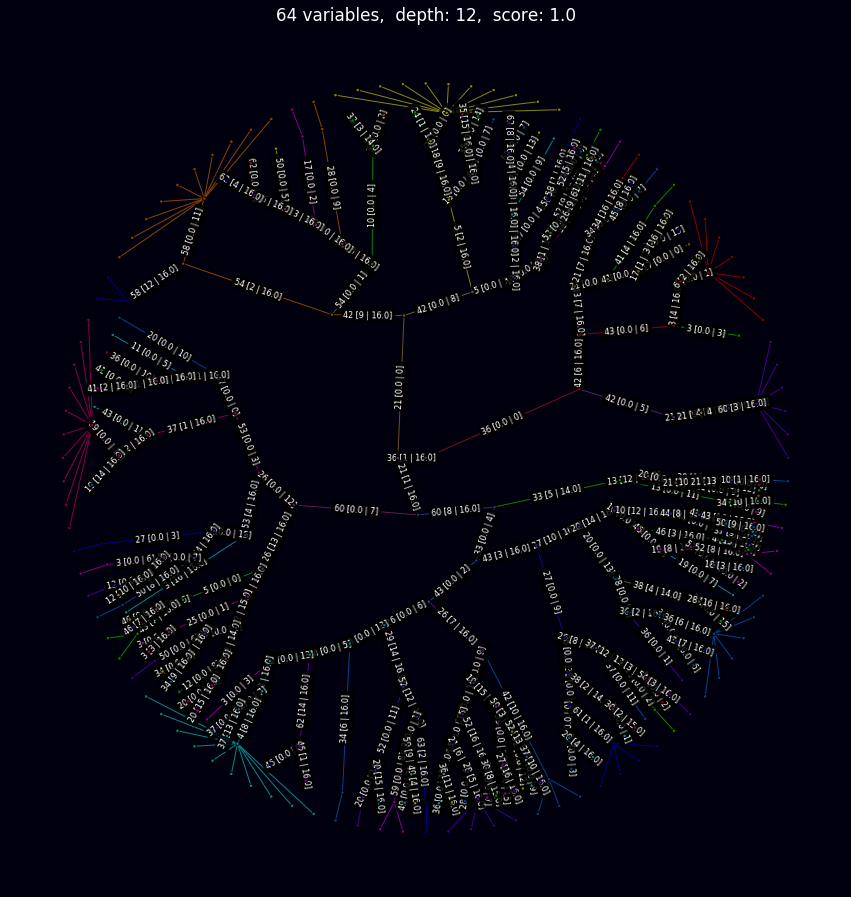

In [4]:
radtree.plot_radial(dtree, X=X_train,Y=y_train, random_state=random_state)

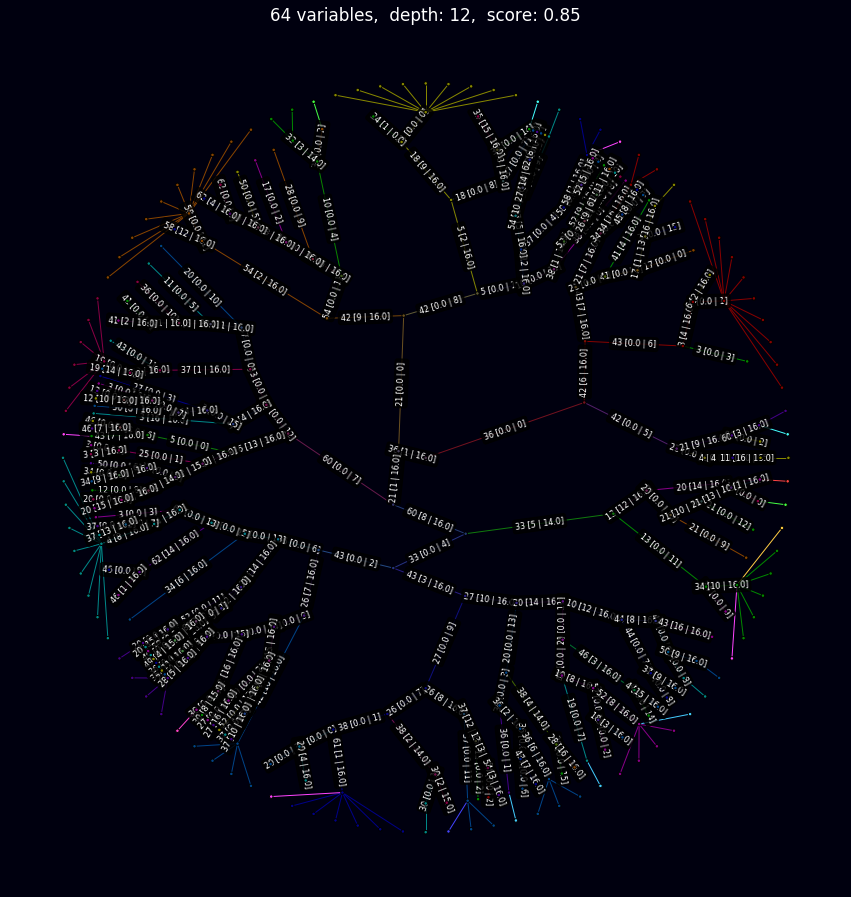

In [5]:
radtree.plot_radial(dtree, X=X_test,Y=y_test, random_state=random_state)

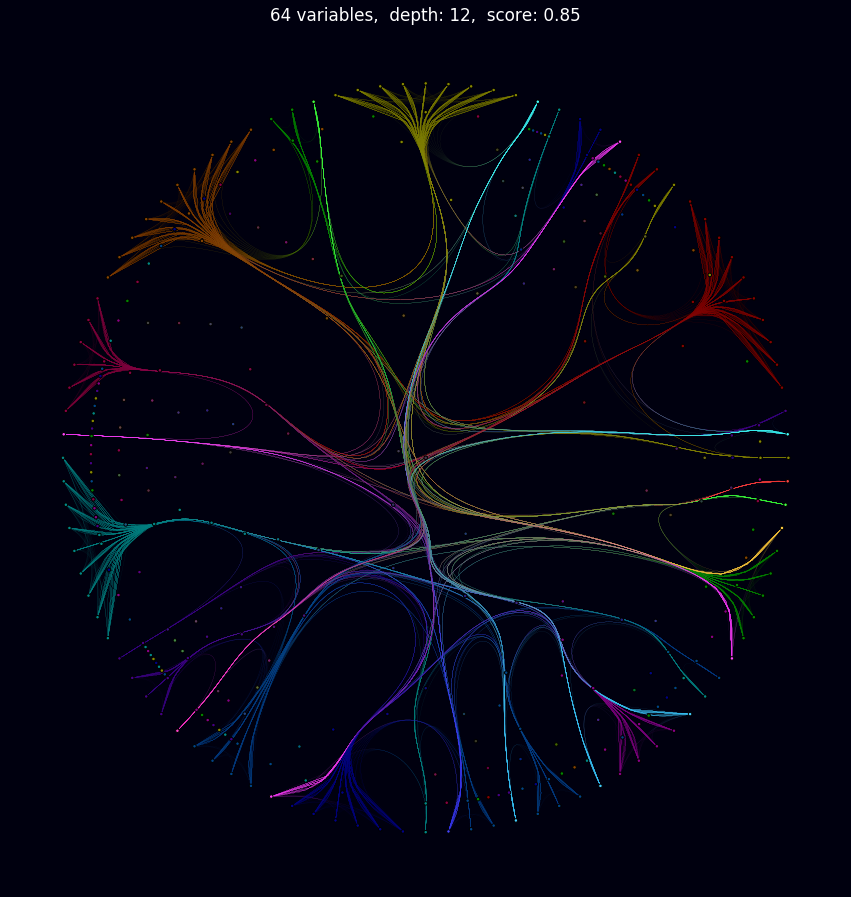

In [6]:
radtree.plot_radial(dtree, X=X_test,Y=y_test, 
                    smooth_d=8,
                    random_state=random_state,
                    l_alpha=.5, l_width=.1
                   )

# Feature Selection

In [7]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=random_state)
dtree_rfe = feature_selection.RFECV(DecisionTreeClassifier(random_state=random_state), step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X_train, y_train)
sel_features = dtree_rfe.get_support()
dtree = DecisionTreeClassifier(random_state=random_state)
dtree.fit(X_train[:,sel_features], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

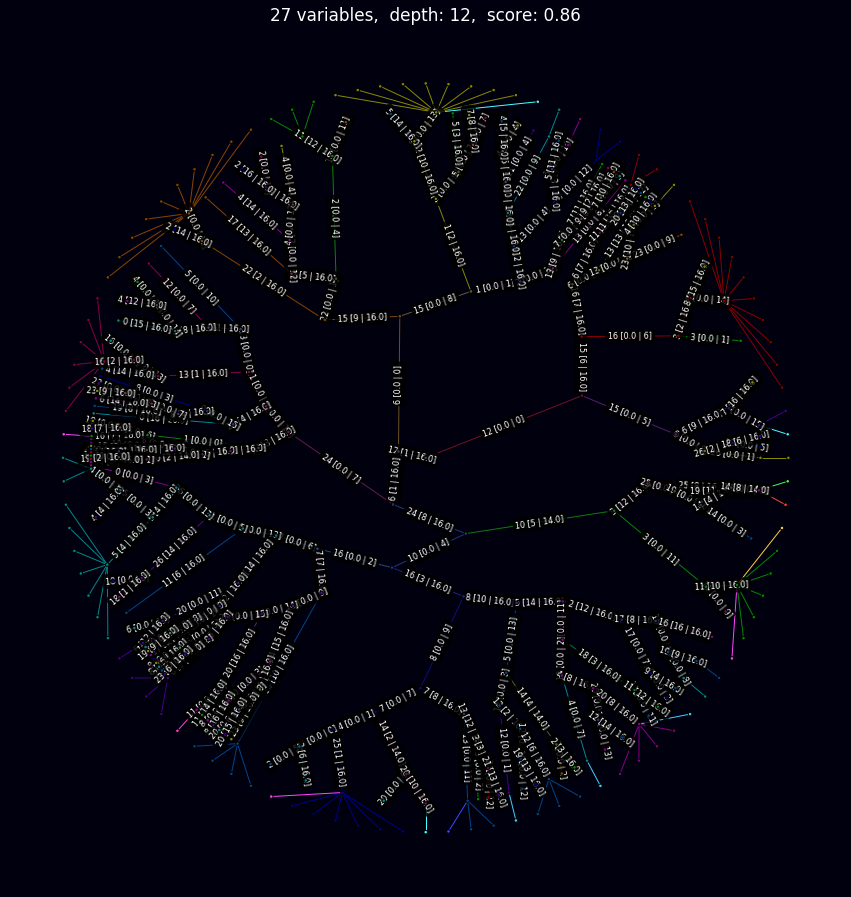

In [8]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, random_state=random_state)

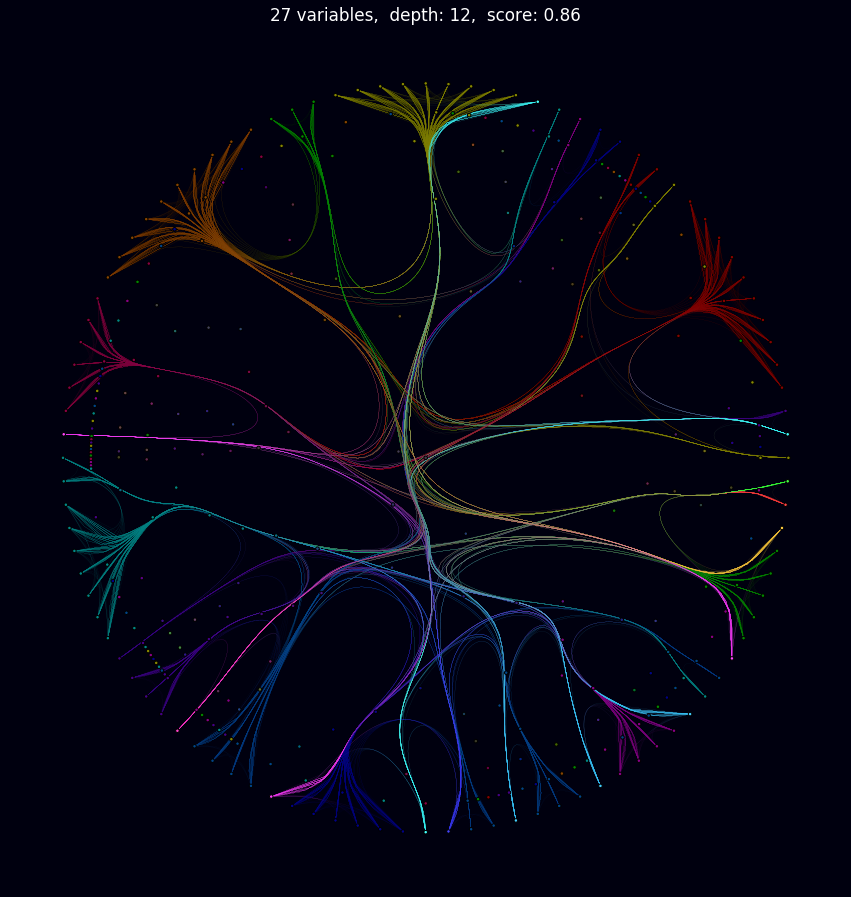

In [9]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, smooth_d=8, l_alpha=.5, l_width=.1, random_state=random_state)

# Grid Search CV

In [10]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [6,7,8,9,10,None],
              'random_state': [random_state],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10,.03,.05],
              'min_samples_leaf': [1,5,10,.03,.05], 
              'max_features': [None, 'auto'],
             }
dtree_gscv = model_selection.GridSearchCV(DecisionTreeClassifier(random_state=random_state), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
dtree_gscv.fit(X_train[:,sel_features], y_train)
dtree = dtree_gscv.best_estimator_
dtree_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

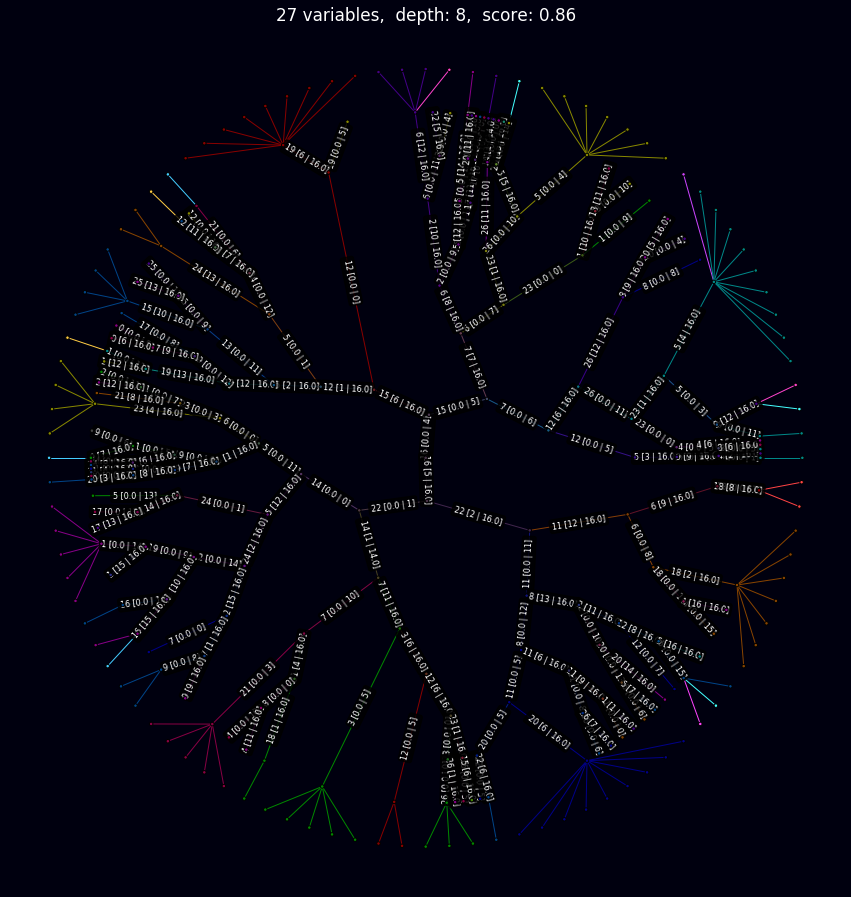

In [11]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, random_state=random_state)

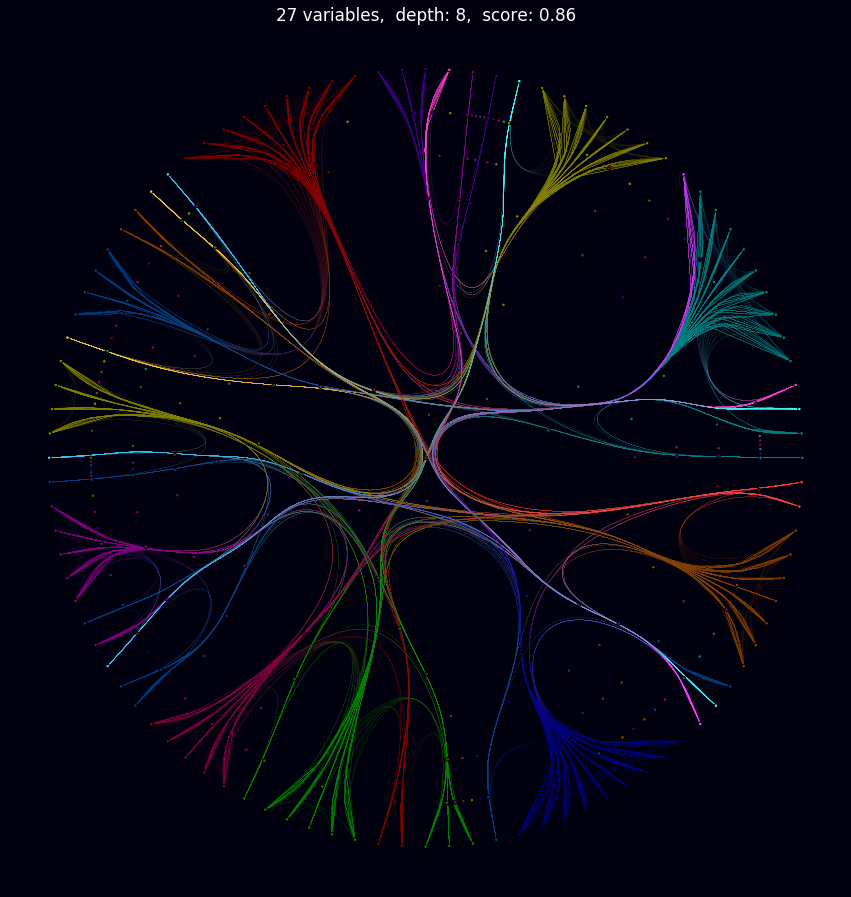

In [12]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, smooth_d=8, l_alpha=.8, l_width=.1, random_state=random_state)